<a href="https://colab.research.google.com/github/Tharini-2004/data-science/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

covid_data = pd.read_csv('/content/covid_19_india (2) (1).csv')

print(covid_data.head())


columns_of_interest = ['ConfirmedForeignNational','Cured','Deaths','Confirmed']


subset_data = covid_data[columns_of_interest]


correlation_matrix = subset_data.corr()

print(correlation_matrix)


   Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30-01-2020  6:00 PM               Kerala                       1   
1    2  31-01-2020  6:00 PM               Kerala                       1   
2    3  01-02-2020  6:00 PM               Kerala                       2   
3    4  02-02-2020  6:00 PM               Kerala                       3   
4    5  03-02-2020  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  Latitude  Longitude  \
0                        0      0       0          1   10.8505    76.2711   
1                        0      0       0          1   10.8505    76.2711   
2                        0      0       0          2   10.8505    76.2711   
3                        0      0       0          3   10.8505    76.2711   
4                        0      0       0          3   10.8505    76.2711   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          N

<ipython-input-14-0ef50ce02a86>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_data.corr()


<ipython-input-16-78b4b3c5364c>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_copy['Date'] = pd.to_numeric(pd.to_datetime(data_copy['Date']))


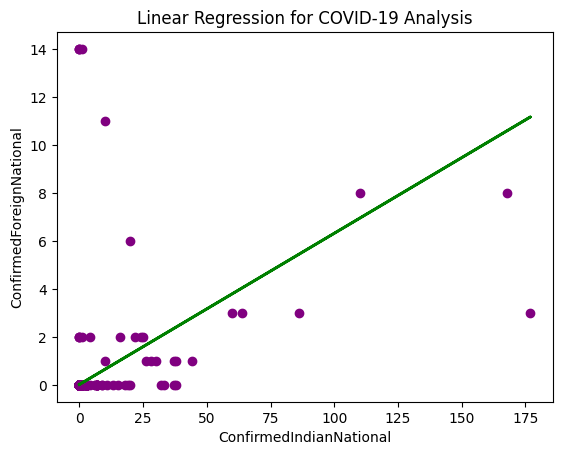

Mean Absolute Error: 0.05610802638359297
Mean Squared Error: 0.29054636099174497
Root Mean Squared Error: 0.5390235254529666
R-squared: 0.07979759294071531


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


df = pd.read_csv('/content/covid_19_india (2).csv',parse_dates=[0], dayfirst=True)
df.head(5)
data = df[['Date', 'ConfirmedForeignNational', 'ConfirmedIndianNational']]

data_copy['ConfirmedForeignNational'] = pd.to_numeric(data_copy['ConfirmedForeignNational'], errors='coerce').fillna(0)
data_copy['ConfirmedIndianNational'] = pd.to_numeric(data_copy['ConfirmedIndianNational'], errors='coerce').fillna(0)


data_copy['Date'] = pd.to_numeric(pd.to_datetime(data_copy['Date']))


X = data_copy[['ConfirmedIndianNational']]
y = data_copy['ConfirmedForeignNational']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, color='purple')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.xlabel('ConfirmedIndianNational')
plt.ylabel('ConfirmedForeignNational')
plt.title('Linear Regression for COVID-19 Analysis')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r_squared = metrics.r2_score(y_test, y_pred)
print('R-squared:', r_squared)


<ipython-input-2-10643f7a1882>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')
<ipython-input-2-10643f7a1882>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))


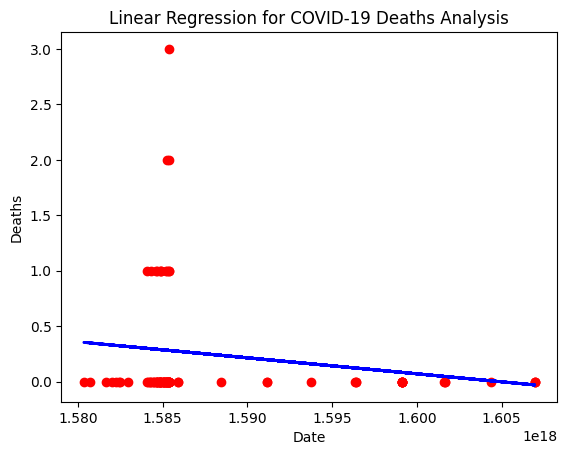

Mean Absolute Error (Deaths): 0.35745622202363103
Mean Squared Error (Deaths): 0.2654817111880928
Root Mean Squared Error (Deaths): 0.5152491738839499
R-squared: 0.02076418004392


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/covid_19_india (2) (1).csv',parse_dates=[0], dayfirst=True)
data = df[['Date', 'Deaths', 'State/UnionTerritory', 'ConfirmedIndianNational']]
data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')
data = data.dropna(subset=['ConfirmedIndianNational'])
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))
data['State/UnionTerritory'] = pd.Categorical(data['State/UnionTerritory'])
data['State/UnionTerritory'] = data['State/UnionTerritory'].cat.codes
X_death = data[['Date']]
y_death = data['Deaths']
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X_death, y_death, test_size=0.2, random_state=42)
model_death = LinearRegression()
model_death.fit(X_train_death, y_train_death)
y_pred_death = model_death.predict(X_test_death)
plt.scatter(X_test_death, y_test_death, color='red')
plt.plot(X_test_death, y_pred_death, color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Linear Regression for COVID-19 Deaths Analysis')
plt.show()
print('Mean Absolute Error (Deaths):', metrics.mean_absolute_error(y_test_death, y_pred_death))
print('Mean Squared Error (Deaths):', metrics.mean_squared_error(y_test_death, y_pred_death))
print('Root Mean Squared Error (Deaths):', np.sqrt(metrics.mean_squared_error(y_test_death, y_pred_death)))
r_squared = metrics.r2_score(y_test_death, y_pred_death)
print('R-squared:', r_squared)


<ipython-input-4-fd923c2cad3b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')
<ipython-input-4-fd923c2cad3b>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))


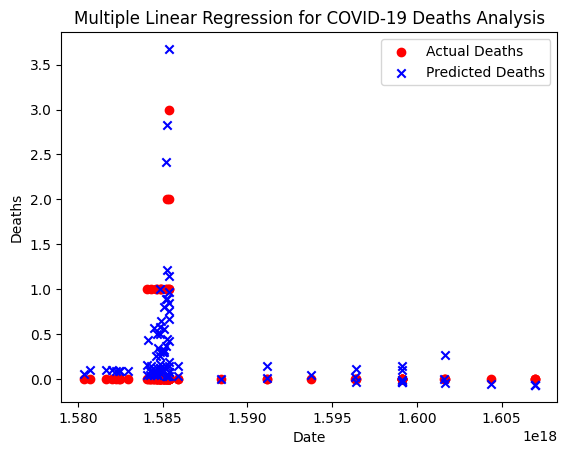

Mean Absolute Error (Deaths): 0.37961096538543565
Mean Squared Error (Deaths): 0.5136193282176422
Root Mean Squared Error (Deaths): 0.7166723995087589


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
data = df[['Date', 'Deaths', 'State/UnionTerritory', 'ConfirmedIndianNational']]
data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')
data = data.dropna(subset=['ConfirmedIndianNational'])
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))
data['State/UnionTerritory'] = pd.Categorical(data['State/UnionTerritory'])
data['State/UnionTerritory'] = data['State/UnionTerritory'].cat.codes

# Prepare the features (X) and target variable (y) for Deaths
X_death = data[['Date', 'ConfirmedIndianNational']]
y_death = data['Deaths']

# Split the data into training and testing sets for Deaths
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X_death, y_death, test_size=0.2, random_state=42)

# Create a linear regression model for Deaths
model_death = LinearRegression()

# Train the model for Deaths
model_death.fit(X_train_death, y_train_death)

# Make predictions on the testing set for Deaths
y_pred_death = model_death.predict(X_test_death)

# Visualize the results for Deaths
plt.scatter(X_test_death['Date'], y_test_death, color='red', label='Actual Deaths')
plt.scatter(X_test_death['Date'], y_pred_death, color='blue', label='Predicted Deaths', marker='x')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Multiple Linear Regression for COVID-19 Deaths Analysis')
plt.legend()
plt.show()

# Evaluate the model for Deaths
print('Mean Absolute Error (Deaths):', metrics.mean_absolute_error(y_test_death, y_pred_death))
print('Mean Squared Error (Deaths):', metrics.mean_squared_error(y_test_death, y_pred_death))
print('Root Mean Squared Error (Deaths):', np.sqrt(metrics.mean_squared_error(y_test_death, y_pred_death)))



<ipython-input-6-f5353814cab6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')
<ipython-input-6-f5353814cab6>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))


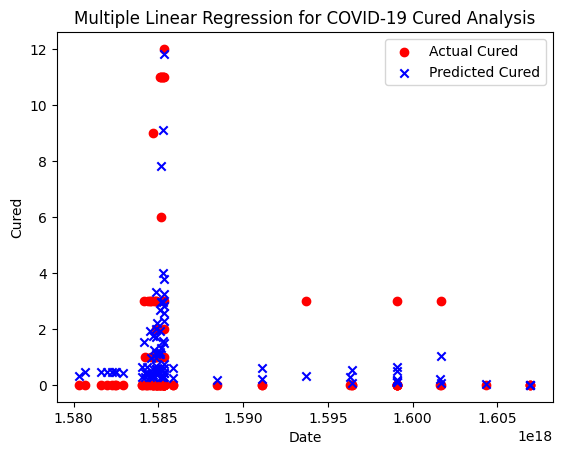

Mean Absolute Error (Cured): 1.2511001759027949
Root Mean Squared Error (Cured): 2.4535729173565337
R-squared: 0.39275015576136785


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Extract relevant columns
data = df[['Date', 'Cured', 'State/UnionTerritory', 'ConfirmedIndianNational']]

# Replace non-numeric values (e.g., '-') with NaN in 'ConfirmedIndianNational'
data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')

# Drop rows with NaN values in 'ConfirmedIndianNational' column
data = data.dropna(subset=['ConfirmedIndianNational'])

# Convert the 'Date' column to a numerical format for regression
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))

# Convert 'State/UnionTerritory' to numerical format
data['State/UnionTerritory'] = pd.Categorical(data['State/UnionTerritory'])
data['State/UnionTerritory'] = data['State/UnionTerritory'].cat.codes

# Prepare the features (X) and target variable (y) for Cured
X_cured = data[['Date', 'ConfirmedIndianNational']]
y_cured = data['Cured']

# Split the data into training and testing sets for Cured
X_train_cured, X_test_cured, y_train_cured, y_test_cured = train_test_split(X_cured, y_cured, test_size=0.2, random_state=42)

# Create a linear regression model for Cured
model_cured = LinearRegression()

# Train the model for Cured
model_cured.fit(X_train_cured, y_train_cured)

# Make predictions on the testing set for Cured
y_pred_cured = model_cured.predict(X_test_cured)

# Visualize the results for Cured
plt.scatter(X_test_cured['Date'], y_test_cured, color='red', label='Actual Cured')
plt.scatter(X_test_cured['Date'], y_pred_cured, color='blue', label='Predicted Cured', marker='x')
plt.xlabel('Date')
plt.ylabel('Cured')
plt.title('Multiple Linear Regression for COVID-19 Cured Analysis')
plt.legend()
plt.show()

# Evaluate the model for Cured
print('Mean Absolute Error (Cured):', metrics.mean_absolute_error(y_test_cured, y_pred_cured))
print('Root Mean Squared Error (Cured):', np.sqrt(metrics.mean_squared_error(y_test_cured, y_pred_cured)))
r_squared = metrics.r2_score(y_test_cured, y_pred_cured)
print('R-squared:', r_squared)


In [ ]:
pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install geopandas matplotlib esda spreg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.5 MB/s eta 0:00:00


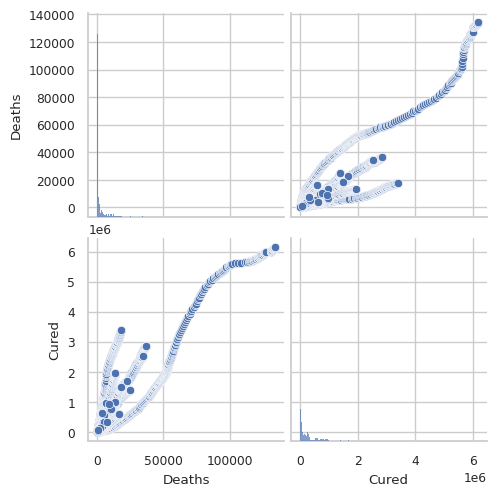

In [ ]:
sns.pairplot(data)

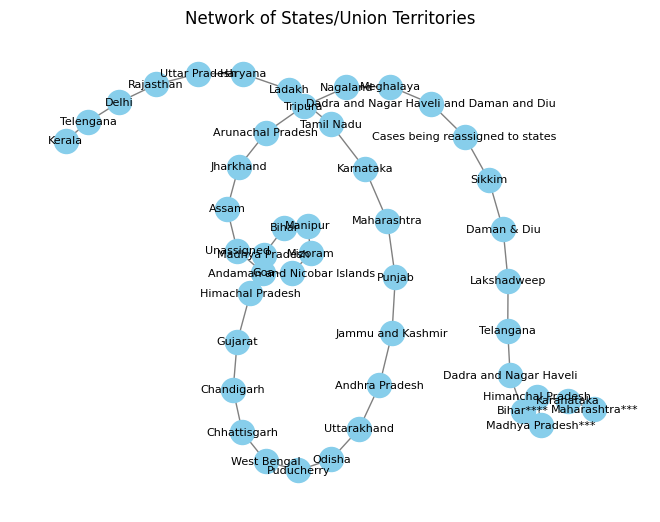

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the COVID-19 data from a CSV file into a DataFrame
covid_data = pd.read_csv('/content/covid_19_india (2).csv')

# Assuming you have a DataFrame named 'covid_data' with columns 'State/UnionTerritory', 'Deaths', 'Cured', 'Latitude', 'Longitude'
# Replace 'Region' with the actual column name that identifies different regions
covid_data = covid_data[['State/UnionTerritory', 'Deaths', 'Cured', 'Latitude', 'Longitude']]

# Create a graph
G = nx.Graph()

# Add nodes to the graph (regions)
for state in covid_data['State/UnionTerritory']:
    G.add_node(state)

# Add edges to the graph based on some criteria (e.g., spatial proximity, similar COVID-19 trends)
# For simplicity, let's connect states that are adjacent to each other alphabetically
states = covid_data['State/UnionTerritory'].unique()
for i in range(len(states)-1):
    G.add_edge(states[i], states[i+1])

# Draw the network
pos = nx.spring_layout(G)  # You can choose different layout algorithms based on your preference
nx.draw(G, pos, with_labels=True, font_size=8, node_size=300, font_color='black', node_color='skyblue', edge_color='gray')
plt.title('Network of States/Union Territories')
plt.show()


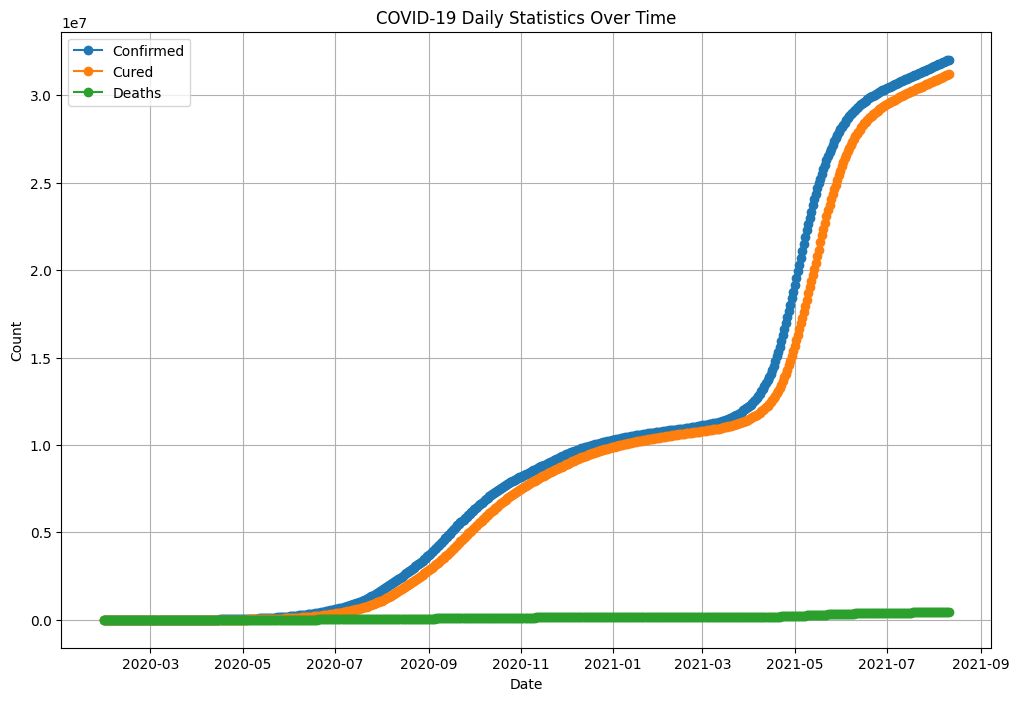

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the COVID-19 data from a CSV file into a DataFrame
covid_data = pd.read_csv('/content/covid_19_india (2).csv')

# Assuming you have a DataFrame named 'covid_data' with columns 'Date', 'State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths'

# Convert 'Date' column to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%d-%m-%Y')  # Adjust the format based on your data

# Group data by date to get daily statistics
daily_stats = covid_data.groupby('Date').agg({
    'Confirmed': 'sum',
    'Cured': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Plot daily statistics over time
plt.figure(figsize=(12, 8))

plt.plot(daily_stats['Date'], daily_stats['Confirmed'], label='Confirmed', marker='o')
plt.plot(daily_stats['Date'], daily_stats['Cured'], label='Cured', marker='o')
plt.plot(daily_stats['Date'], daily_stats['Deaths'], label='Deaths', marker='o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Daily Statistics Over Time')
plt.legend()
plt.grid(True)
plt.show()


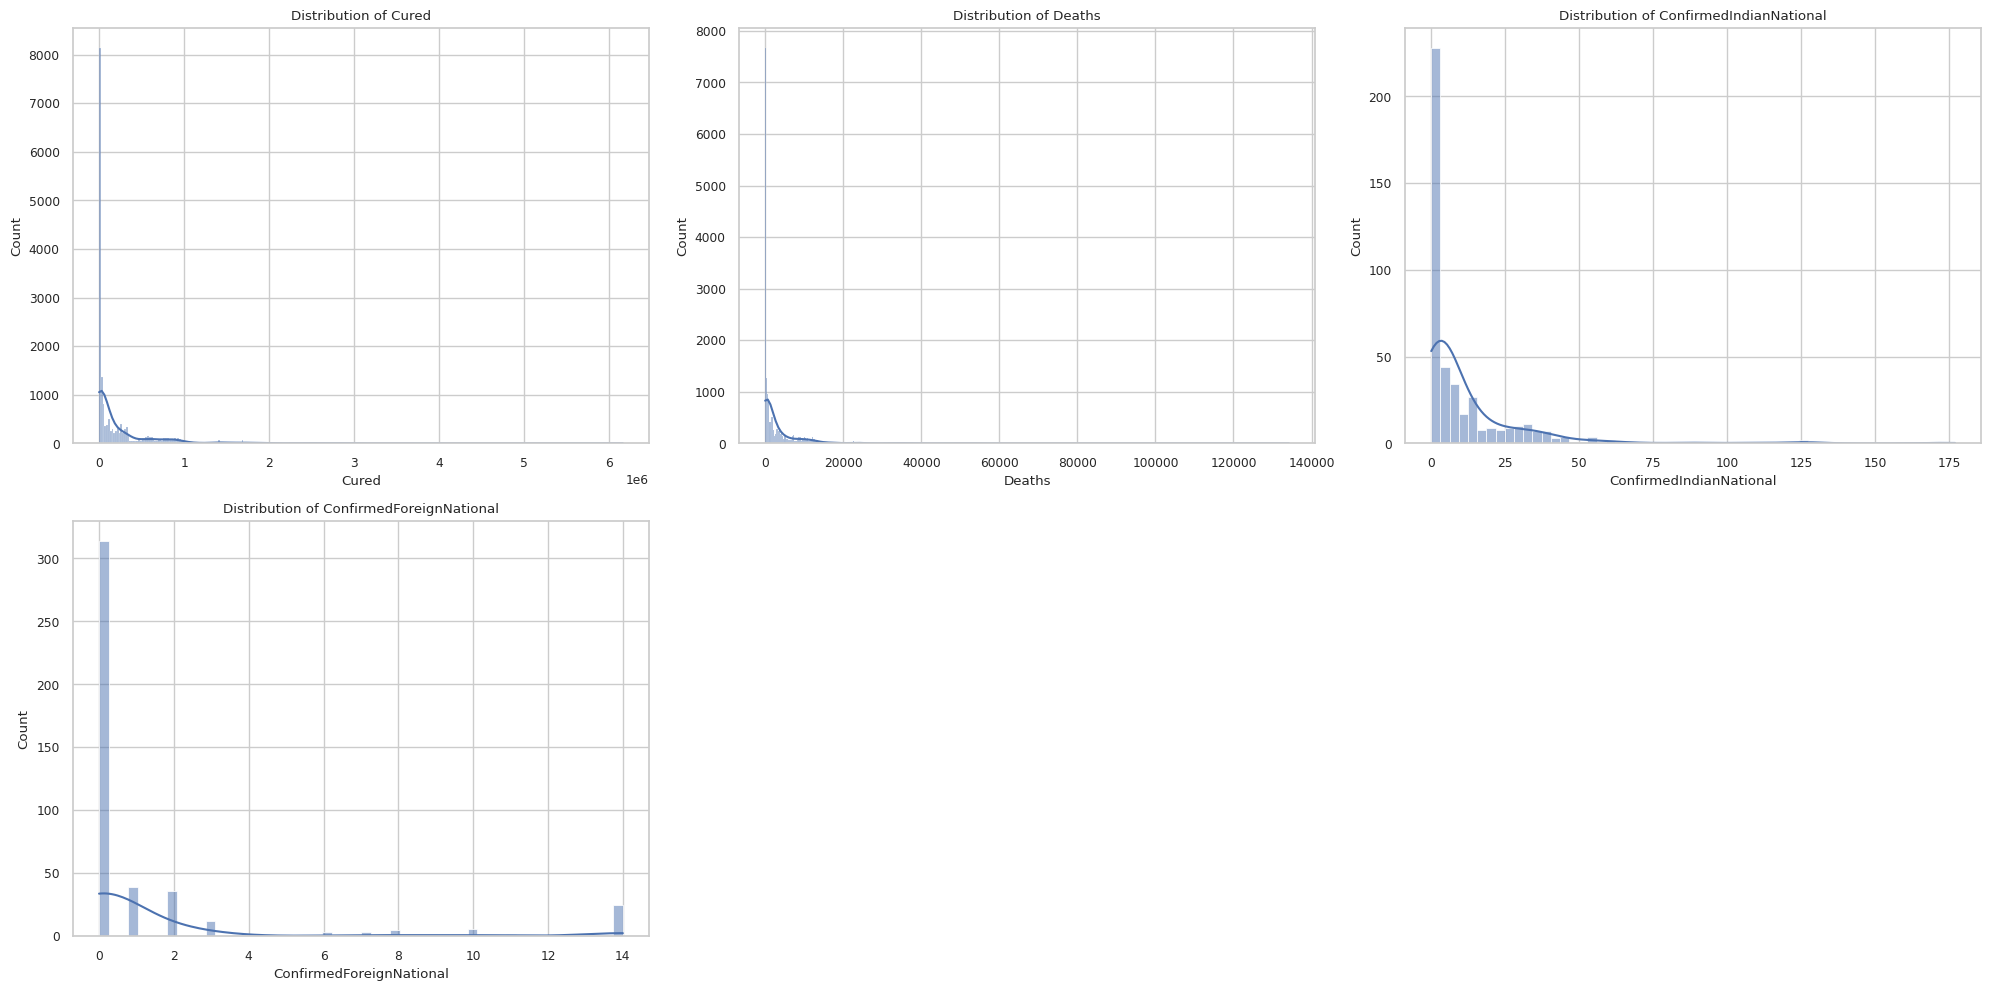

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the COVID-19 data from a CSV file into a DataFrame
covid_data = pd.read_csv('/content/covid_19_india (2).csv')

# Assuming you have a DataFrame named 'covid_data' with numerical columns
# Replace non-numeric values (e.g., '-') with NaN
covid_data = covid_data.apply(pd.to_numeric, errors='coerce')

# Select relevant columns for distribution plots
columns_of_interest = ['Cured', 'Deaths', 'ConfirmedIndianNational', 'ConfirmedForeignNational']
selected_data = covid_data[columns_of_interest]

# Calculate the number of rows and columns for the grid
num_cols = len(selected_data.columns)
num_rows = (num_cols - 1) // 3 + 1

# Display distribution plots for selected columns
sns.set(style="whitegrid", font_scale=0.8)
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through each selected column and create a distribution plot
for i, column in enumerate(selected_data.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(selected_data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


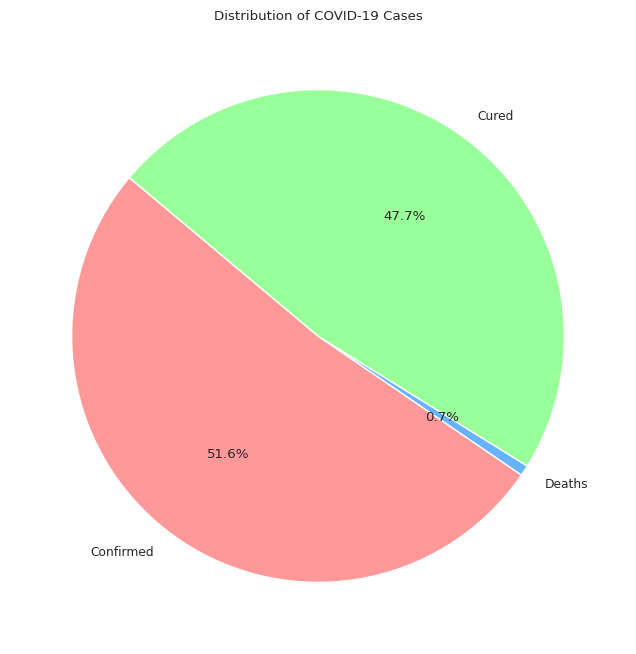

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a COVID-19 dataset in a CSV file, load it into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual file name or URL of your dataset
covid_data = pd.read_csv('/content/covid_19_india (2).csv')

# Assuming your dataset has columns like 'Confirmed', 'Deaths', 'Recovered'
# Replace these with the actual column names in your dataset
cases_data = covid_data[['Confirmed', 'Deaths', 'Cured']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cases_data, labels=cases_data.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of COVID-19 Cases')
plt.show()


In [ ]:
pip install libpysal


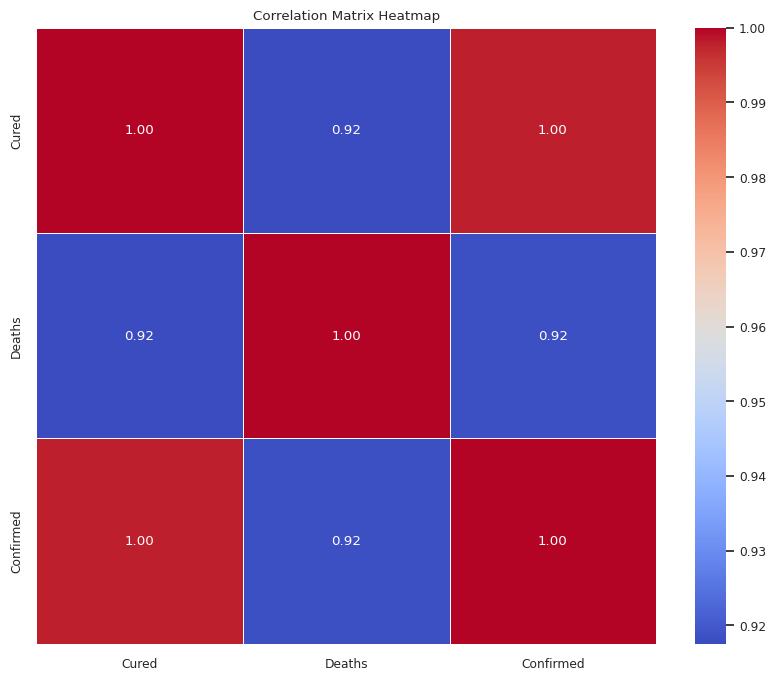

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a COVID-19 dataset in a CSV file, load it into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual file name or URL of your dataset
covid_data = pd.read_csv('/content/covid_19_india (2).csv')

# Assuming you want to analyze correlations between different numerical columns
# Replace 'column1', 'column2', etc., with the actual column names you are interested in
columns_of_interest = ['Cured', 'Deaths', 'Confirmed']

# Create a subset of the DataFrame with only the columns of interest
subset_data = covid_data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Index(['STATE', 'geometry'], dtype='object')


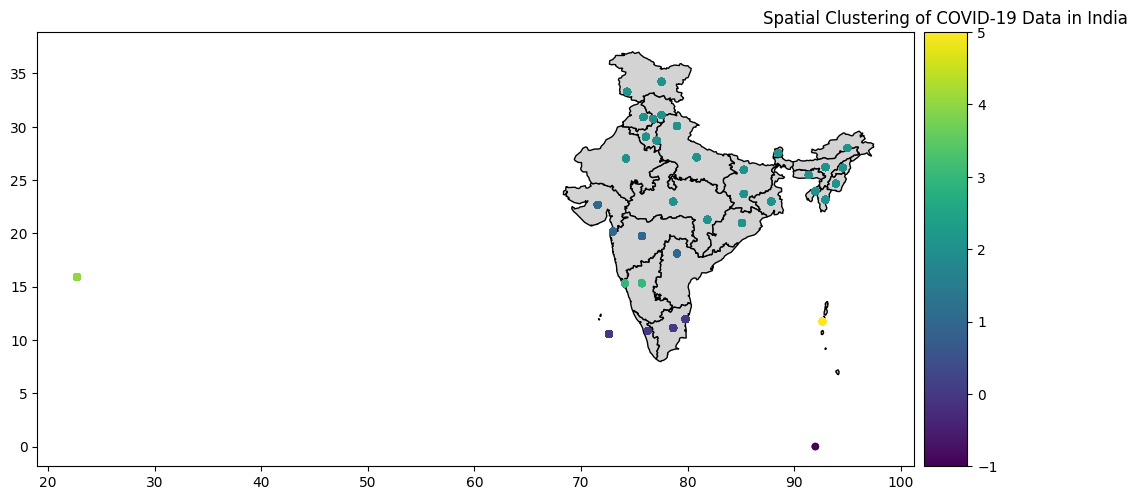

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the COVID-19 data from a CSV file into a DataFrame
covid_data = pd.read_csv('/content/covid_19_india (2) (1).csv')

# Assuming you have a DataFrame named 'covid_data' with columns 'State/UnionTerritory', 'Deaths', 'Cured', 'Latitude', 'Longitude'
# Replace 'Region' with the actual column name that identifies different regions
covid_data = covid_data[['State/UnionTerritory', 'Deaths', 'Cured', 'Latitude', 'Longitude']]

# Replace non-numeric values (e.g., '-') with NaN
covid_data[['Deaths', 'Cured']] = covid_data[['Deaths', 'Cured']].apply(pd.to_numeric, errors='coerce')

# Fill null values with zero
covid_data.fillna(0, inplace=True)

# Create a GeoDataFrame for spatial plotting
geometry = gpd.points_from_xy(covid_data['Longitude'], covid_data['Latitude'])
gdf = gpd.GeoDataFrame(covid_data, geometry=geometry)

# India map shapefile (replace 'path_to_your_shapefile' with the actual path)
india_map = gpd.read_file('/content/india_st.shx')

# Set the CRS for GeoDataFrames
gdf.crs = india_map.crs

# Merge spatial data with COVID-19 data
# Check the columns of india_map to find the correct column name
print(india_map.columns)

# Use the correct column name for merging
merged_data = pd.merge(covid_data, india_map, left_on='State/UnionTerritory', right_on='STATE', how='left')

# Perform spatial clustering using DBSCAN
# Extract latitude and longitude for clustering
X = gdf[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the GeoDataFrame
gdf['Cluster'] = cluster_labels

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

india_map.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, marker='o', column='Cluster', cmap='viridis', markersize=20, alpha=0.7, legend=True, cax=cax)

plt.title('Spatial Clustering of COVID-19 Data in India')
plt.show()


In [ ]:
!pip install networkx


<ipython-input-26-6404c547498a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')


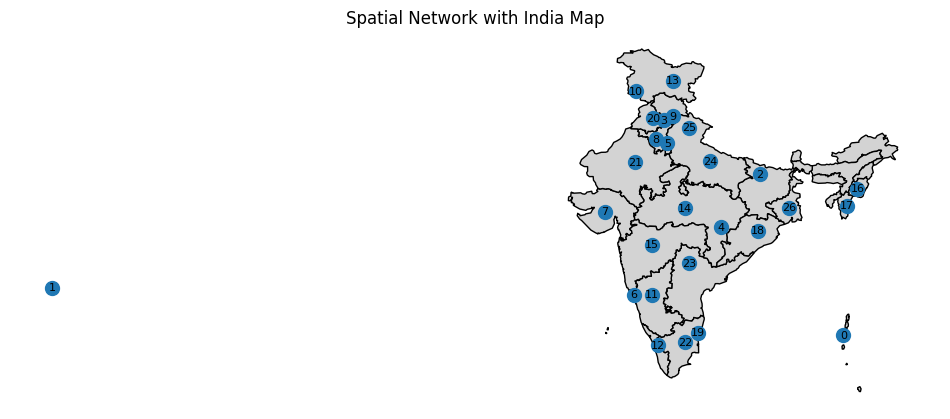

In [ ]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and you have a GeoDataFrame named gdf
# Extract relevant columns
data = df[['Date', 'Cured', 'State/UnionTerritory', 'ConfirmedIndianNational','Longitude','Latitude']]

# Replace non-numeric values (e.g., '-') with NaN in 'ConfirmedIndianNational'
data['ConfirmedIndianNational'] = pd.to_numeric(data['ConfirmedIndianNational'], errors='coerce')

# Drop rows with NaN values in 'ConfirmedIndianNational' column
data = data.dropna(subset=['ConfirmedIndianNational'])

# Convert 'State/UnionTerritory' to numerical format
data['State/UnionTerritory'] = pd.Categorical(data['State/UnionTerritory'])
data['State/UnionTerritory'] = data['State/UnionTerritory'].cat.codes

# Create a GeoDataFrame from the DataFrame if you have spatial data
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Load GeoDataFrame with Indian state geometries (replace 'path_to_shapefile' with the actual path)
india_map = gpd.read_file('/content/india_st.shp')

# Create a spatial network using NetworkX
G = nx.Graph()

# Add nodes (assuming 'State/UnionTerritory' is the node identifier)
G.add_nodes_from(gdf['State/UnionTerritory'])

# Create edges (you may need to adjust this based on your specific data)
# For example, you might want to add edges based on spatial distance or other criteria
# Here, we're adding edges between adjacent nodes for simplicity
for i, row in gdf.iterrows():
    neighbors = gdf[gdf.geometry.touches(row['geometry'])]['State/UnionTerritory'].tolist()
    G.add_edges_from((row['State/UnionTerritory'], neighbor) for neighbor in neighbors)

# Spatial network analysis using NetworkX
# You can perform various analyses based on your specific goals

# Visualize the network on a map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot India map
india_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot network edges
pos = {node: (gdf.loc[gdf['State/UnionTerritory'] == node, 'Longitude'].values[0],
              gdf.loc[gdf['State/UnionTerritory'] == node, 'Latitude'].values[0])
       for node in G.nodes}

nx.draw(G, pos=pos, with_labels=True, node_size=100, font_size=8, ax=ax, edge_color='blue')

plt.title('Spatial Network with India Map')
plt.show()